In [1134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')

In [1135]:
def execute_fit_predict(classifier, X_train, y_train, X_test):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    return pred

In [1136]:
def execute_evaluate(y_test, pred=None, pred_proba=None):
    # get confusion matrix
    confusion = confusion_matrix( y_test, pred)
    # get accuracy score
    accuracy = accuracy_score(y_test , pred)
    # get precision
    precision = precision_score(y_test , pred)
    # get recall
    recall = recall_score(y_test , pred)
    # get f1 score
    f1 = f1_score(y_test,pred)
    # get auc score
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    result = {
        "confusion": confusion,
        "accuracy": accuracy.round(4),
        "precision": precision.round(4),
        "recol": recall.round(4),
        "f1": f1.round(4),
        "roc_auc": roc_auc.round(4)
    }

    return result


In [1137]:
def execute_cross_validation(classifier, X_features, y_targets, folds):
    kfold = KFold(n_splits=folds)
    scores = []
    for i , (train_index, test_index) in enumerate(kfold.split(X_features)):
        # Create index pointing to training and validation data by cross-validation from the data
        X_train, X_test = X_features.values[train_index], X_features.values[test_index]
        y_train, y_test = y_targets.values[train_index], y_targets.values[test_index]
        
        # train and fit
        pred = execute_fit_predict(classifier=classifier, X_train=X_train, y_train=y_train, X_test=X_test)
        pred_proba = classifier.predict_proba(X_test)[:,1]
        score = execute_evaluate(y_test=y_test, pred=pred, pred_proba=pred_proba)
        scores.append({i : score})
    return scores


In [1138]:
def roc_curve_plot(y_test , pred_proba1, pred_proba2):
    fpr1, tpr1, threshold = roc_curve(y_test, pred_proba1)
    fpr2, tpr2, threshold = roc_curve(y_test, pred_proba2)

    plt.plot(fpr1, tpr1, 'o-', ms=2, label="Random Forest")
    plt.plot(fpr2, tpr2, 'o-', ms=2, label="Decision Tree")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.title('ROC Curve')
    plt.show()

# Create Train, Test dataset

In [1139]:
X_features = df.drop(['Fraud'], axis=1)
y_targets = df['Fraud']
X_train, X_test, y_train, y_test=train_test_split(X_features, y_targets, test_size=0.3)


# Decision Tree
## Without cross validation vs With cross validation

In [1140]:
decision_tree = DecisionTreeClassifier()
pred = execute_fit_predict(classifier=decision_tree, X_train=X_train, y_train=y_train, X_test=X_test)
pred_proba = decision_tree.predict_proba(X_test)[:,1]
evaluation = execute_evaluate(y_test=y_test,pred=pred,pred_proba=pred_proba)
print("With out cross validation")
print(evaluation)
# print("\n**********************************************************************************************************\n")
# cross_validation_scores = execute_cross_validation(classifier=decision_tree, X_features=X_features, y_targets=y_targets, folds=10)
# print("With cross validation top 5")
# print(*cross_validation_scores[0:5], sep='\n')

# cross_val_score_API = cross_val_score(decision_tree, X_features, y_targets, scoring = 'roc_auc', cv=10)
# print(cross_val_score_API)


With out cross validation
{'confusion': array([[22,  3],
       [ 1, 10]]), 'accuracy': 0.8889, 'precision': 0.7692, 'recol': 0.9091, 'f1': 0.8333, 'roc_auc': 0.8945}


# Random Forest
## Without cross validation vs With cross validation by 10 folds

With out cross validation
{'confusion': array([[22,  3],
       [ 0, 11]]), 'accuracy': 0.9167, 'precision': 0.7857, 'recol': 1.0, 'f1': 0.88, 'roc_auc': 1.0}


<AxesSubplot:>

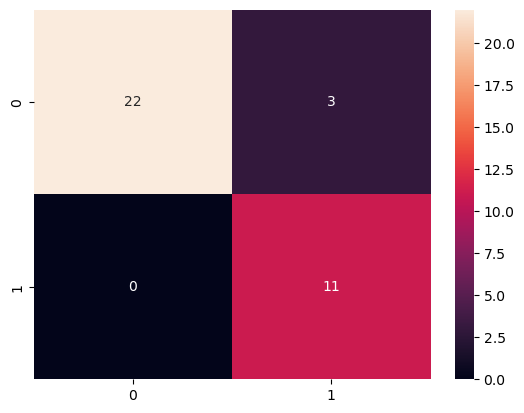

In [1141]:
random_forest = RandomForestClassifier()
pred = execute_fit_predict(classifier=random_forest, X_train=X_train, y_train=y_train, X_test=X_test)
pred_proba = random_forest.predict_proba(X_test)[:,1]
evaluation = execute_evaluate(y_test=y_test,pred=pred,pred_proba=pred_proba)
print("With out cross validation")
print(evaluation)
sns.heatmap(evaluation['confusion'], annot=True)
# print("\n**********************************************************************************************************\n")
# cross_validation_scores = execute_cross_validation(classifier=random_forest, X_features=X_features, y_targets=y_targets, folds=10)
# print("With cross validation top 5")
# print(*cross_validation_scores[0:5], sep='\n')
# roc_curve_plot(y_test=y_test, pred_proba1=random_forest.predict_proba(X_test)[:,1], pred_proba2=decision_tree.predict_proba(X_test)[:,1])

